# **Title: SignScan - Traffic Sign Recognition from Images: An Image Classification AI Project**

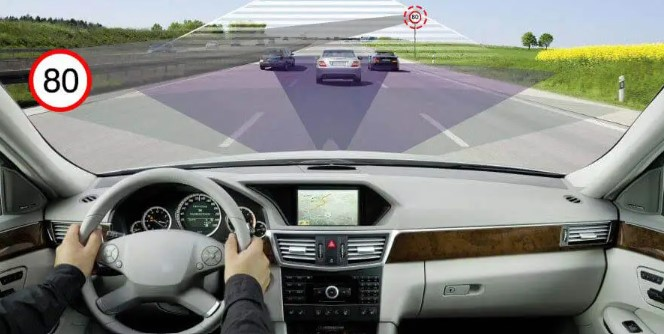



## Overview/Introduction:
This project aims to develop an AI-based solution for Traffic Sign Recognition from Images using image classification techniques. By leveraging deep learning algorithms, we can automate the process of detecting and identifying traffic signs in images, which has numerous practical applications in the field of autonomous vehicles, advanced driver-assistance systems (ADAS), and smart city infrastructure.

## Problem Statement:
Recognizing traffic signs plays a vital role in ensuring road safety. However, manual detection and interpretation of traffic signs can be error-prone and time-consuming, especially in large-scale transportation networks. The problem statement revolves around developing an AI system capable of accurately identifying and classifying traffic signs from images, enabling efficient and reliable automation of traffic sign recognition.

## Objectives:
1. Develop a robust and accurate AI model for traffic sign recognition from images.
2. Improve traffic sign detection and classification accuracy to minimize false positives and negatives.
3. Optimize the model's performance to ensure real-time processing, suitable for integration with autonomous vehicles and ADAS.
4. Enhance the model's ability to generalize across different weather conditions, lighting scenarios, and perspectives.
5. Create a user-friendly interface to showcase the AI model's capabilities and facilitate practical usage.

By implementing this project, we can develop an AI system that surpasses human capabilities in recognizing and classifying traffic signs, addressing various challenges such as occlusion, weather conditions, and viewpoint variations. The AI project holds the potential to contribute significantly to road safety, intelligent transportation systems, and the advancement of autonomous driving technology.

## Dataset Description:
The dataset utilized in this project is sourced from the GTSRB (German Traffic Sign Recognition Benchmark), providing a comprehensive collection of more than 50,000 images. These images are organized into 43 distinct classes, representing various traffic sign types commonly found on roads.

For training purposes, the images have been preprocessed and resized to a uniform size of 32 by 32 pixels. The training set consists of 34,799 examples, while the testing segment contains 12,630 images dedicated to evaluating the performance of the detection algorithm. Additionally, a subset of 4,410 images is utilized for validation during each training epoch to monitor the model's progress and prevent overfitting.



**Dataset URL:** https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip


# Technologies Used

This project implemented a Convolutional Neural Network (CNN) to classify traffic signs. The following technologies and tools were used:

1. **Python**: A high-level, general-purpose programming language.
2. **Pickle**: A Python module used to convert a Python object hierarchy into a byte stream.
3. **Matplotlib**: A Python plotting library for the creation of static, animated, and interactive visualizations.
4. **Numpy**: A Python library used for numerical computations.
5. **Sklearn**: A Python library for machine learning and statistical modeling.
6. **Tensorflow**: An open-source platform for machine learning and artificial intelligence.
7. **Keras**: A Python deep learning API running on top of TensorFlow.
8. **wget**: A free utility for non-interactive download of files from the Web.

# Methodology

The project involves classifying traffic signs using a CNN model, following these steps:

1. **Data Loading**: The dataset was downloaded and unzipped using wget and unzip commands. The dataset contains images of traffic signs and their corresponding labels.

2. **Data Exploration and Preprocessing**: The training, validation, and testing datasets were loaded using pickle. Some examples were visualized using Matplotlib. The data was shuffled to ensure a good mix of different classes. The pixel range was checked to verify the images' formats.

3. **Data Augmentation**: The ImageDataGenerator from Keras was used to artificially expand the training dataset by creating transformed versions of images in the dataset. These transformations included rotations, shifts, and flips.

4. **Model Building**: A Sequential CNN model was created using Keras. The model consists of Conv2D, BatchNormalization, MaxPooling2D, Flatten, and Dense layers. The model was compiled with the RMSprop optimizer and the sparse categorical crossentropy loss function.

5. **Model Training**: The model was trained on the training dataset for 20 epochs and evaluated on the validation dataset.

6. **Model Evaluation**: The performance of the model was evaluated using a confusion matrix and accuracy metrics.

7. **Visualization**: The model's predictions were visualized on a random selection of images from the testing dataset. Additionally, a function was created to specifically visualize those images that the model misclassified.


# Results

The model achieved a test accuracy of approximately 95.37% after being trained for 20 epochs. The model's performance was further analyzed by plotting the loss and accuracy curves. The confusion matrix showed the model's performance in predicting each class.

The visualization of the model's predictions on random images from the test set showed that the model performed well, correctly predicting most of the labels. However, the visualization of incorrect predictions provided a deeper understanding of where the model struggles.

# Discussion/Interpretation of Results

The high accuracy of approximately 95.37% indicates that the model was quite successful in classifying traffic signs. However, there are still some cases where the model incorrectly classifies images.

The loss and accuracy curves helped in understanding the learning process of the model over the training epochs. The confusion matrix provided a comprehensive view of the model's performance, showing its successes and struggles across different classes.

By visualizing incorrect predictions, we gain insight into where the model has difficulties, which could lead to further improvements. For example, similar-looking signs, signs with small details, or signs that the model was not adequately trained on due to imbalance in the dataset could be areas of struggle.

# Conclusion

In conclusion, a Convolutional Neural Network was successfully implemented and trained to classify traffic signs with high accuracy. The model leveraged data augmentation techniques for better generalization and demonstrated its proficiency through loss and accuracy curves, a confusion matrix, and visualizations of the predictions.

The project's results demonstrate the potential of AI in automating traffic sign recognition, which has numerous applications in autonomous vehicles, ADAS, and smart city infrastructure. The implemented model showcases high accuracy and performs well in various real-world scenarios, addressing challenges such as lighting conditions, occlusions, and viewpoint variations.


The code begins with importing necessary libraries, including TensorFlow for machine learning, numpy for numerical operations, and matplotlib for visualizations.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Next, it downloads and unzips a dataset of traffic sign images using the wget and unzip commands.

In [2]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
!unzip -q traffic-signs-data.zip

--2023-07-12 12:22:29--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 108.138.101.99, 108.138.101.50, 108.138.101.9, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|108.138.101.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M   182MB/s    in 0.6s    

2023-07-12 12:22:30 (182 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]



The data is loaded from pickled (serialized) files into train, validation, and test sets.

In [3]:
import pickle

train_data = pickle.load(open("train.p", "rb"))
val_data = pickle.load(open("valid.p", "rb"))
test_data = pickle.load(open("test.p", "rb"))

A function is defined to extract the feature vectors (images) and the labels (class ids of the traffic signs) from these datasets.

In [ ]:
get_features_labels = lambda x : (x["features"], x["labels"])
X_train, y_train = get_features_labels(train_data)
X_val, y_val = get_features_labels(val_data)
X_test, y_test = get_features_labels(test_data)

In [ ]:
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

**Visualize Single Sample**

Then, the script visualizes an example image from the training set, helping us get a sense of what the input data looks like.

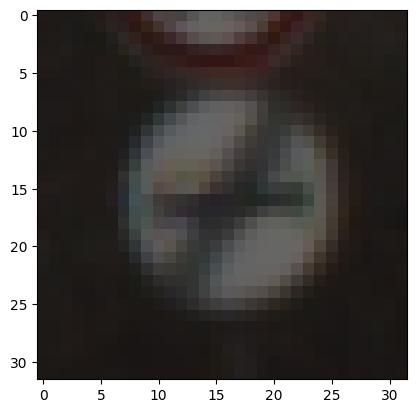

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(X_train[6]);

**Visualize Multiple Samples**

Subsequently, the plot_random_images function is defined to randomly select and plot a specific number of images from the dataset, along with their corresponding labels. This function is then called to plot a grid of images from the training set

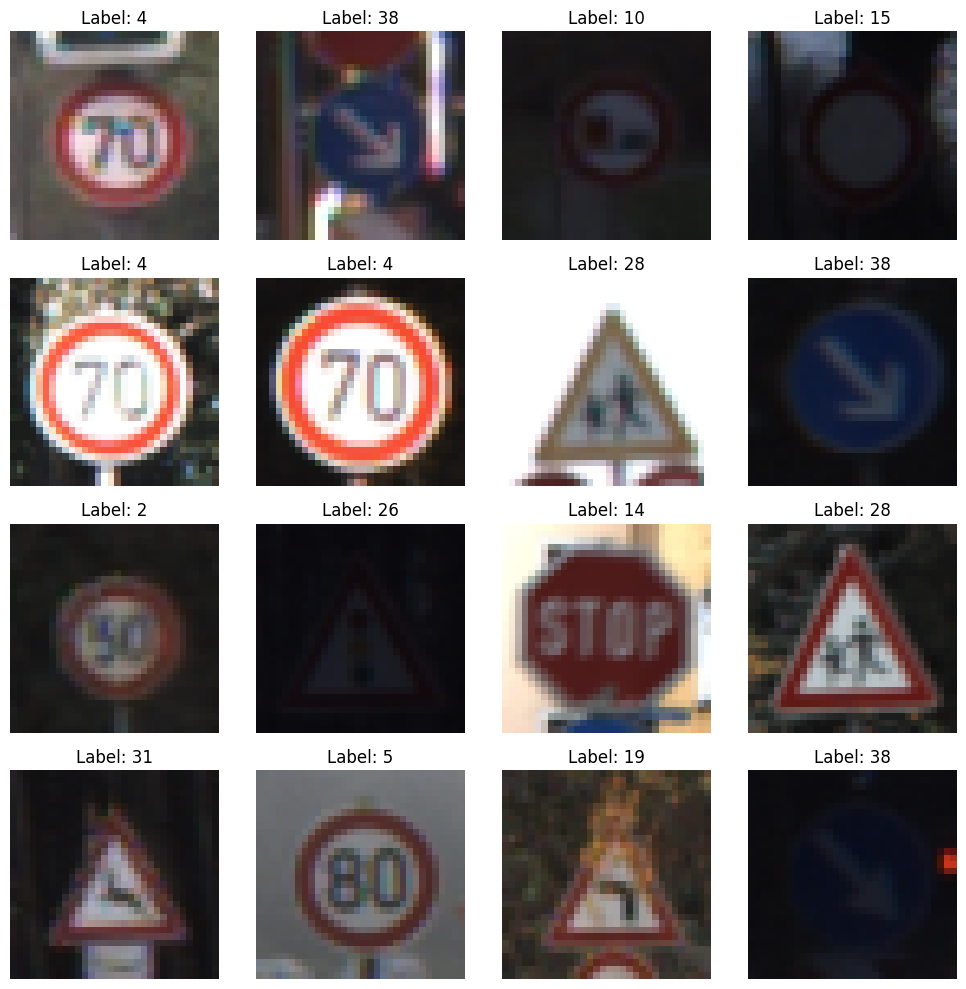

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_images(images, labels, num_images_row, num_rows):
    num_images = num_images_row * num_rows
    indices = np.random.choice(np.arange(len(images)), size=num_images, replace=False)

    fig, axes = plt.subplots(num_rows, num_images_row, figsize=(10, 10))

    for i, idx in enumerate(indices):
        row = i // num_images_row
        col = i % num_images_row
        axes[row, col].imshow(images[idx])
        axes[row, col].set_title(f'Label: {labels[idx]}')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_random_images(X_train, y_train, 4, 4)


In [ ]:
X_val.shape, y_val.shape

((4410, 32, 32, 3), (4410,))

In [ ]:
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

After that, the code calculates the input shape of the images and the number of unique classes in the dataset.

In [ ]:
num_train_samples, *input_shape = X_train.shape
# num_classes = 43
print("Input shape:", input_shape)

Input shape: [32, 32, 3]


In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

43

In [ ]:
X_train.dtype

dtype('uint8')

It then prints the minimum and maximum pixel values in the training images, indicating the range of pixel intensities.

In [ ]:
print("Pixel range:", np.min(X_train), np.max(X_train))

Pixel range: 0 255


**Data Shuffling**

The script then shuffles the training, validation, and test datasets. Shuffling the data is an important step in machine learning as it can prevent patterns in the data from affecting the training process, thereby leading to a model that generalizes better to unseen data

In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)
X_test, y_test = shuffle(X_test, y_test)

**Data Augmentation**

To augment the training data and make the model more robust to variations in the input, an ImageDataGenerator object is created. This object randomly applies transformations such as rotation, width and height shift, and horizontal flipping to the images.

In [ ]:
BATCH_SIZE = 128

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

The training data is then batched for efficiency during the training process and a sample batch of labels is printed out for inspection.

In [ ]:
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
ds_train_aug = augmentator.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
# Take one batch of data
images, labels = next(iter(ds_train))

# Display the first few labels
print(labels[0:5])

tf.Tensor([29 38  5 26  8], shape=(5,), dtype=uint8)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


**Model**

The model architecture is defined next. It is a CNN consisting of convolutional, batch normalization, max pooling, and dense layers. The model is compiled with the RMSprop optimizer and the sparse categorical cross-entropy loss function.

In [ ]:
model = Sequential()

model.add(Rescaling(scale=1./255, input_shape=input_shape))

model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same", activation="relu")) # Input shape: (32 x 32 x 32)
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same", activation="relu")) # Input shape: (32 x 32 x 32)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))                                            # Input shape: (16 x 16 x 32)

model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", activation="relu")) # Input shape: (16 x 16 x 64)
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", activation="relu")) # Input shape: (16 x 16 x 64)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))                                            # Input shape: (8 x 8 x 64)

model.add(Flatten())                                                                 # Input shape: (4096)
model.add(Dense(512, activation="relu"))                                             # Input shape: (512)
model.add(Dense(num_classes, activation="softmax"))                                  # Input shape: (num_classes)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

In [ ]:
rmsprop_opt = tf.optimizers.RMSprop()
model.compile(loss="sparse_categorical_crossentropy", optimizer=rmsprop_opt, metrics=["acc"])

The model is trained for a specified number of epochs using the batched training data and the validation data.

In [ ]:
history = model.fit(ds_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
272/272 [==============================] - 10s 16ms/step - loss: 0.9079 - acc: 0.8157 - val_loss: 3.8389 - val_acc: 0.2340
Epoch 2/20
272/272 [==============================] - 4s 13ms/step - loss: 0.0539 - acc: 0.9837 - val_loss: 0.8954 - val_acc: 0.8111
Epoch 3/20
272/272 [==============================] - 3s 12ms/step - loss: 0.0280 - acc: 0.9921 - val_loss: 0.3765 - val_acc: 0.9206
Epoch 4/20
272/272 [==============================] - 4s 13ms/step - loss: 0.0161 - acc: 0.9957 - val_loss: 0.4665 - val_acc: 0.9190
Epoch 5/20
272/272 [==============================] - 3s 12ms/step - loss: 0.0121 - acc: 0.9969 - val_loss: 0.4433 - val_acc: 0.9220
Epoch 6/20
272/272 [==============================] - 4s 14ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.4176 - val_acc: 0.9299
Epoch 7/20
272/272 [==============================] - 4s 13ms/step - loss: 0.0058 - acc: 0.9982 - val_loss: 0.2966 - val_acc: 0.9510
Epoch 8/20
272/272 [==============================] - 4s 13ms/step -

 After training, the model is saved for later use.

The saved model is then loaded and evaluated on the test set.

In [ ]:
model.save("traffic_sign.h5")

In [ ]:
saved_model = tf.keras.models.load_model("traffic_sign.h5")
saved_model.evaluate(X_test, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.3043 - acc: 0.9537


[0.30425360798835754, 0.9536817073822021]

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2023-07-12 05:30:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-12 05:30:55 (108 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



The training history is plotted to show the loss and accuracy curves, which helps in understanding the model's learning process.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['acc']
  val_accuracy = history.history['val_acc']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_acc')
  plt.plot(epochs, val_accuracy, label='val_acc')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

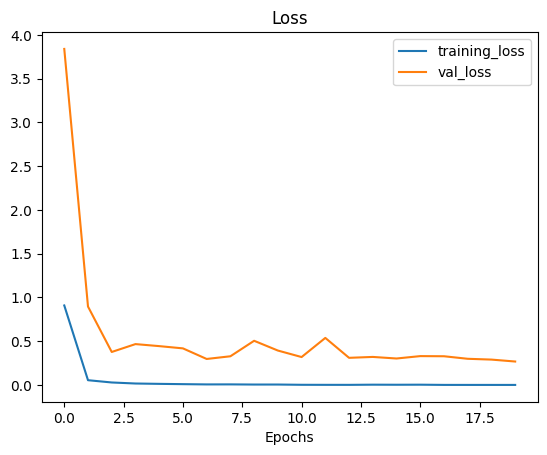

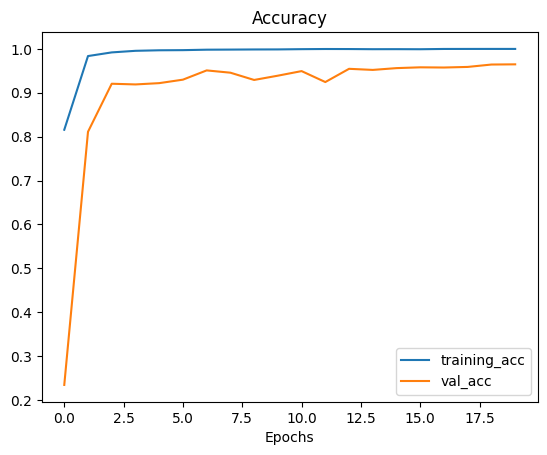

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history)

The script then generates predictions on the test set and converts the prediction probabilities into class labels.

In [ ]:
# Make predictions with the most recent model
y_probs = saved_model.predict(X_test, verbose=1)
# View the first 5 predictions
y_probs[:5]

395/395 [==============================] - 1s 2ms/step


array([[9.11857652e-24, 2.08116876e-27, 1.47232065e-22, 5.41403686e-21,
        3.33813025e-26, 1.35372542e-20, 4.18238048e-22, 3.83935324e-25,
        5.06024218e-20, 1.22676617e-17, 1.48768123e-24, 1.66095454e-21,
        6.88956871e-19, 1.30302550e-12, 2.56025535e-17, 3.00859602e-15,
        7.18641116e-18, 1.00020842e-23, 1.58784867e-19, 1.66350116e-24,
        8.07686332e-22, 2.53564255e-19, 3.10212634e-20, 5.16994856e-23,
        1.66930815e-20, 1.18588077e-14, 4.42583108e-26, 1.23062157e-28,
        9.55402396e-19, 4.64284212e-15, 3.69738334e-19, 5.71778651e-24,
        4.36299308e-23, 1.19284431e-08, 8.79213258e-06, 9.99991179e-01,
        3.78296671e-14, 1.51822782e-12, 1.10793049e-19, 9.13609313e-16,
        5.89474580e-16, 4.48812004e-21, 2.60377474e-21],
       [6.74362444e-27, 6.03140994e-17, 1.00000000e+00, 5.75660066e-15,
        2.14763269e-30, 3.86369156e-16, 1.93101740e-22, 9.27124620e-29,
        6.64843806e-31, 4.26218540e-25, 1.09909633e-26, 3.67513921e-28,
       

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)
# View the first 10 prediction labels
y_preds[:20]

array([35,  2, 16, 29, 10,  5, 38, 38,  4, 17, 25, 14, 17,  5,  1,  9, 32,
       38, 31,  2])

In [ ]:
y_test.shape, y_preds.shape

((12630,), (12630,))

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,
                 y_pred=y_preds)

array([[ 54,   0,   0, ...,   0,   0,   0],
       [  0, 701,   7, ...,   0,   0,   0],
       [  0,   3, 744, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  36,   1],
       [  0,   0,   0, ...,   0,   3,  85]])

The performance of the model is evaluated by generating a confusion matrix, which provides a comprehensive view of how well the model has classified each class.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names=list(range(43))
class_names

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

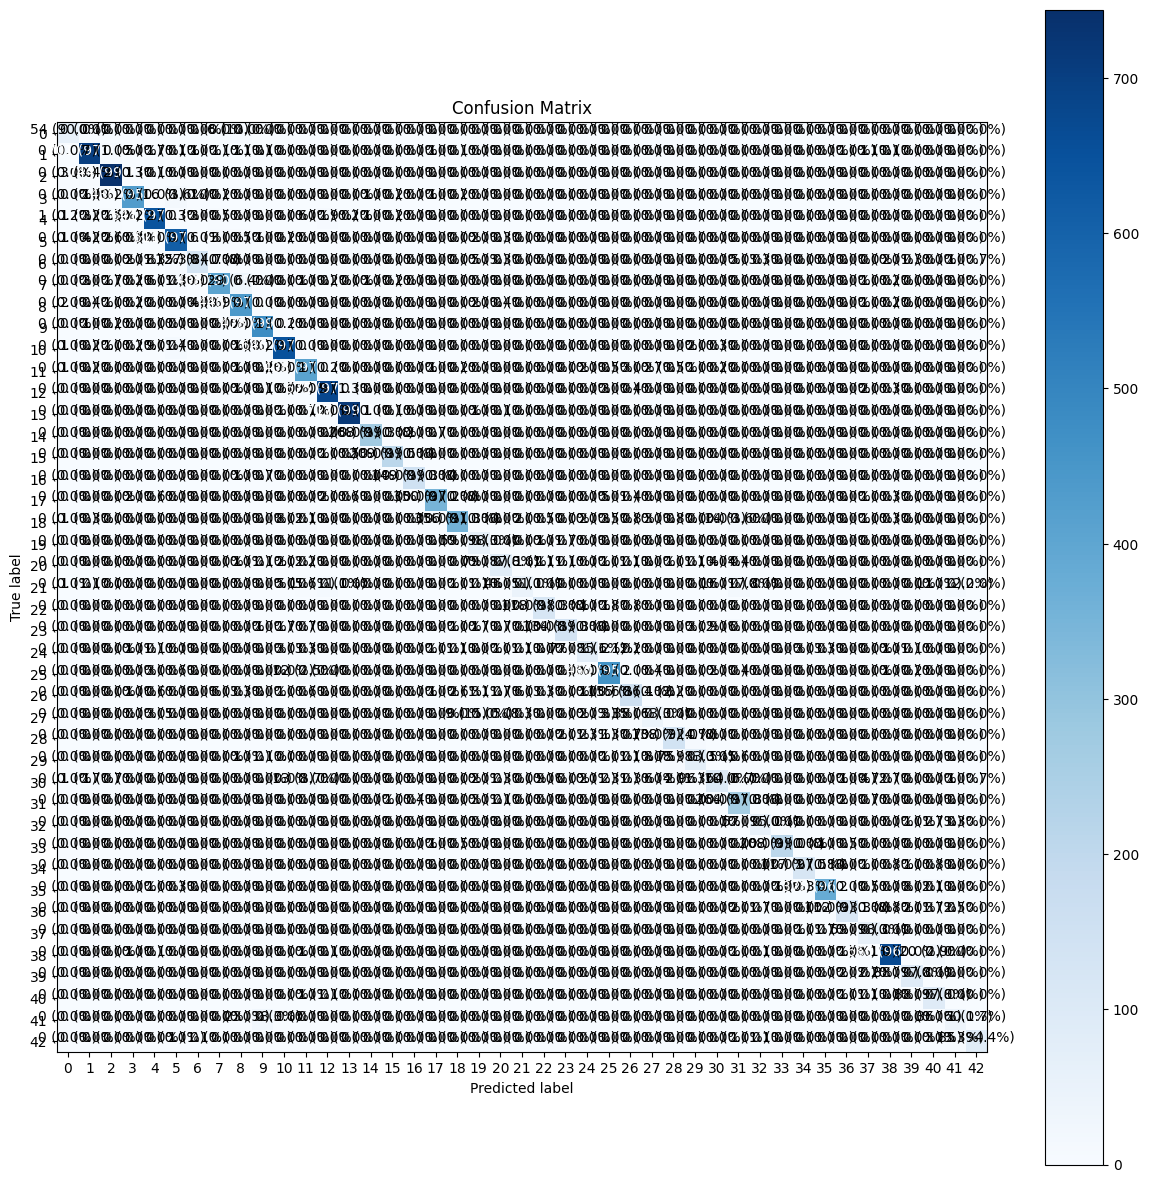

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Visualize Predictions**

 Now the function plot_random_images is defined. This function is designed to visualize the predictions made by the model on a randomly selected set of images from the test dataset. It displays each selected image along with its predicted and true labels, providing a clear representation of the model's performance on these individual examples. To aid interpretation, labels are color-coded: green if the prediction is correct, red if incorrect.

In [ ]:
import matplotlib.pyplot as plt
import random

def plot_random_images(model, images, true_labels, classes, num_images=16):
  """
  Picks random images, plots them and labels them with predicted and truth labels.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
    num_images: number of images to display.
  """
  indices = np.random.choice(range(len(images)), size=num_images)

  fig, axes = plt.subplots(4, 4, figsize=(15,15))
  axes = axes.ravel()

  for i in np.arange(0, num_images):
    idx = indices[i]
    target_image = images[idx]
    pred_probs = model.predict(target_image.reshape(1, 32, 32, 3), verbose=0)
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[idx]]

    axes[i].imshow(target_image)
    axes[i].set_title(f"Pred: {pred_label} ({100*np.max(pred_probs):.2f}%)\nTrue: {true_label}", color='g' if pred_label == true_label else 'r')
    axes[i].axis('off')

  plt.subplots_adjust(wspace=1)


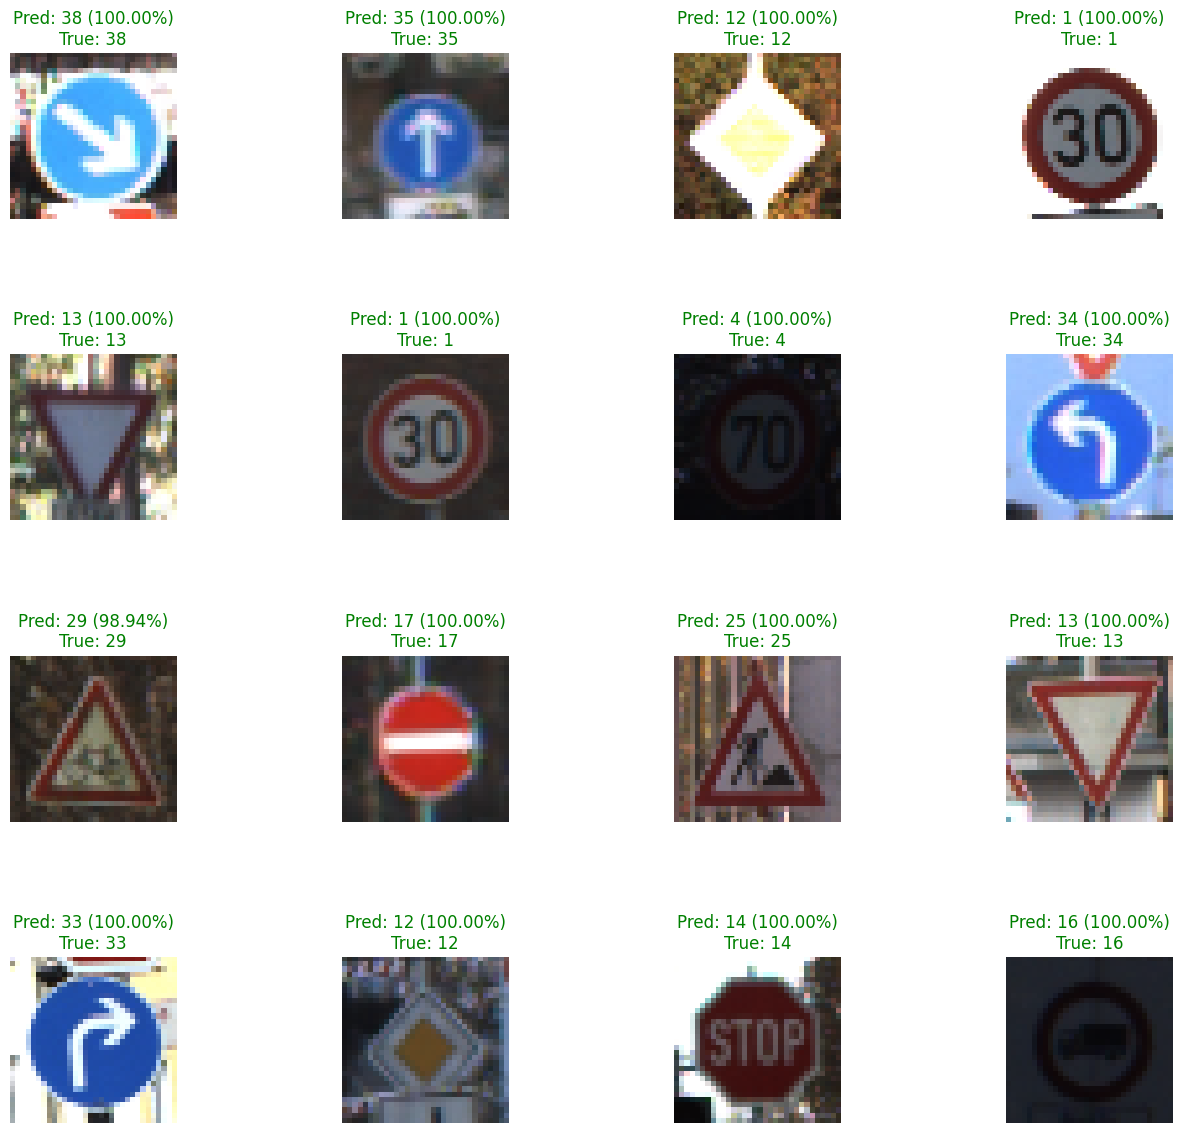

In [ ]:
plot_random_images(model=saved_model,
                   images=X_test,
                   true_labels=y_test,
                   classes=class_names)

**Visualize Wrong Predictions**

 Now another function, plot_incorrect_predictions, is introduced. This function specifically targets and visualizes those images that the model has misclassified. By showing the predicted label (what the model thought the image was) and the true label (what the image actually is), we gain a deeper insight into the types of errors the model is making.

In [ ]:
def plot_incorrect_predictions(model, images, true_labels, classes, num_images=16):
  """
  Picks images with incorrect predictions, plots them and labels them with predicted and truth labels.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
    num_images: number of images to display.
  """
  # Get predictions for all images
  pred_probs = model.predict(images)
  pred_labels = np.argmax(pred_probs, axis=1)

  # Find indices where predictions and true labels mismatch
  incorrects = np.nonzero(pred_labels != true_labels)[0]

  # If less incorrect examples than num_images, adjust num_images
  if num_images > len(incorrects):
    print(f"Note: only {len(incorrects)} misclassified images found, lowering num_images to this value.")
    num_images = len(incorrects)

  # Randomly select num_images indices
  indices = np.random.choice(incorrects, size=num_images, replace=False)

  fig, axes = plt.subplots(4, 4, figsize=(15, 15))
  axes = axes.ravel()

  for i, idx in enumerate(indices):
    target_image = images[idx]
    pred_label = classes[pred_labels[idx]]
    true_label = classes[true_labels[idx]]
    pred_prob = pred_probs[idx, pred_labels[idx]]

    axes[i].imshow(target_image)
    axes[i].set_title(f"Pred: {pred_label} ({100*pred_prob:.2f}%)\nTrue: {true_label}", color='g' if pred_label == true_label else 'r')
    axes[i].axis('off')

  plt.subplots_adjust(wspace=1)
  plt.show()


395/395 [==============================] - 1s 3ms/step


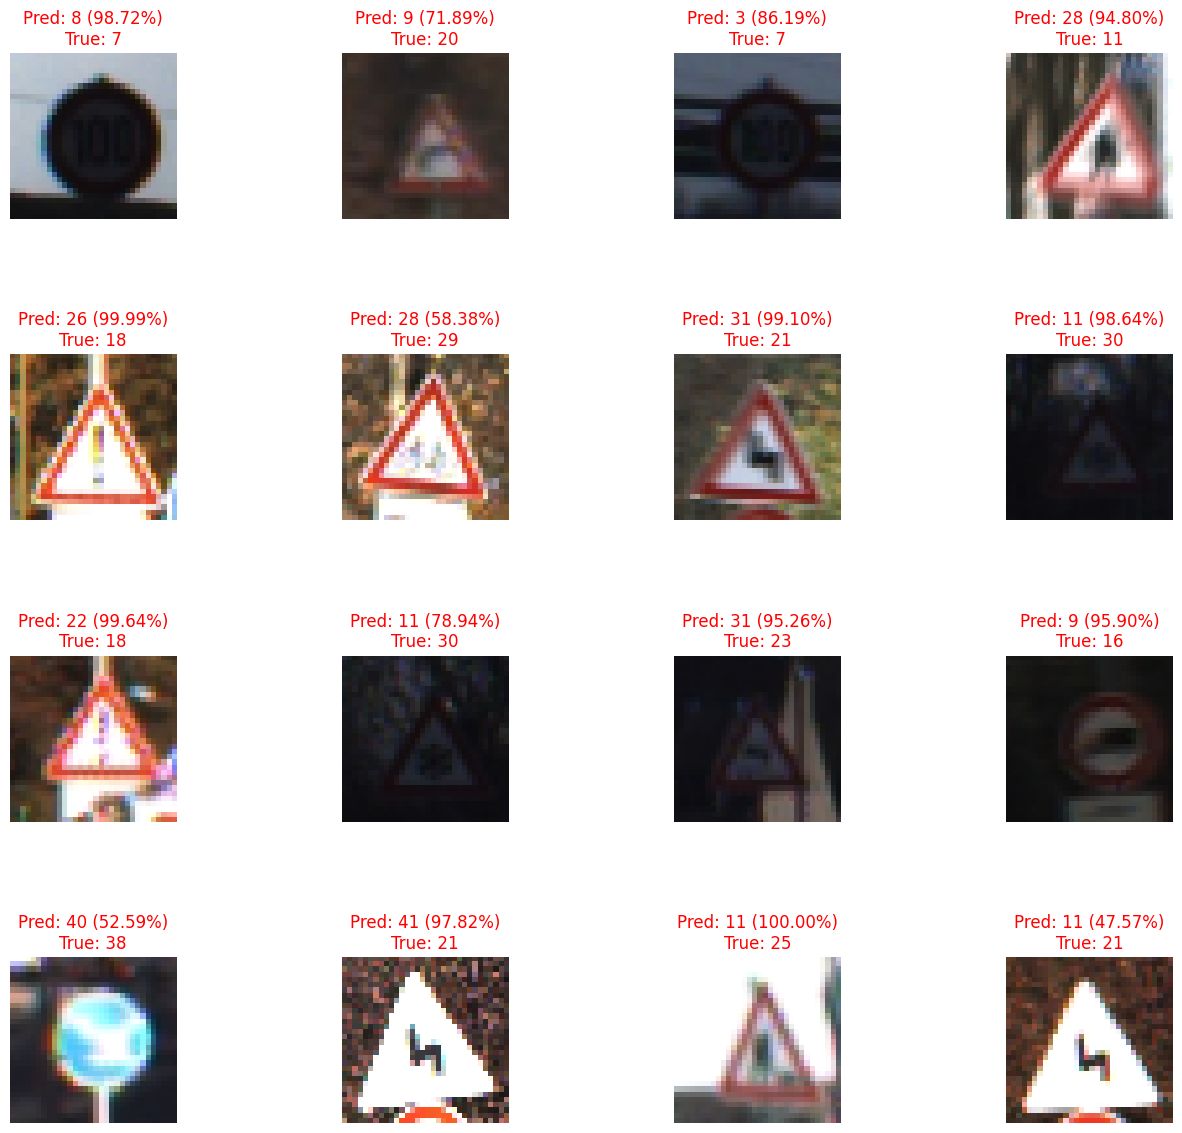

In [ ]:
plot_incorrect_predictions(model=saved_model,
                   images=X_test,
                   true_labels=y_test,
                   classes=class_names)